In [2]:
import pandas as pd
import os
import seaborn as sns
import plotnine as pn
import matplotlib.pyplot as plt

In [3]:
# data_dir = "intermediate_data/temp"
# # print(os.path.exists(data_dir + "/" + "enrichments_temp.csv"))
# enrichments = pd.read_csv(data_dir + "/" + "enrichments_temp.csv", index_col=0)
# spot_info = pd.read_csv(data_dir + "/" + "spot_info_temp.csv", index_col=0)
# # predicted_enrichments = pd.read_csv(data_dir + "/" + "predicted.csv")
data_dir = "intermediate_data/predicted_enrichments/predicted_updn"
# print(os.path.exists(data_dir + "/" + "enrichments_temp.csv"))
enrichments = pd.read_csv(data_dir + "/" + "orig_enrichments.csv", index_col=0)
spot_info = pd.read_csv(data_dir + "/"+ "orig_info.csv", index_col=0)
# predicted_enrichments = pd.read_csv(data_dir + "/" + "predicted.csv")

## Up Dn Gene Sets

In [4]:
from pathway_enrich_deg import get_de_genes

data_dir = "intermediate_data/temp"

config = pd.read_csv("classify/main_config.csv", index_col=0)
config.set_index('simple_biopsy', drop = False, inplace = True)
config['patient'] = [x[0] for x in config['biopsy_sample_id'].str.split(pat = "-")]
# FILTER PATIENT LIST
config = config.loc[config.loc[:, 'annotated_classification'] == 'Tumor' ,:]
genes = get_de_genes(config_df=config, n_filter=100, split_fc=True)
gene_sets = pd.DataFrame(genes)
gene_sets.to_csv(data_dir + "/" + "gene_sets_used.csv")

c:\Users\cbainton\Desktop\ST_project\pathway_enrich_deg.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\cbainton\Desktop\ST_project\pathway_enrich_deg.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\cbainton\Desktop\ST_project\pathway_enrich_deg.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\cbainton\Desktop\ST_project\pathway_enrich_deg.py:94: SettingWithCopyWarning: 
A value is trying to be set on

In [5]:
gene_sets = pd.read_csv(data_dir + "/" + "gene_sets_used.csv", index_col = 0)

In [6]:
genes_dict = {
    col.split("_")[0] + " " + col.split("_")[3].upper() : set(gene_sets[col].to_list()) for col in gene_sets.columns
}

What is the overlap between each of these gene sets, pairwise?

In [7]:
intersection_frac = pd.DataFrame(columns=['set1', 'set2', 'overlap'])

intersections_dict = {}
for set1 in genes_dict.keys():
    for set2 in genes_dict.keys():
        intersections_dict[(set1, set2)] = len(genes_dict[set1] & genes_dict[set2]) # how large is the intersection
        intersection_frac = pd.concat([intersection_frac,
                                       pd.DataFrame(
                                           data = {'set1':set1, 'set2' : set2, 
                                                   'overlap' : 100 * len(genes_dict[set1] & genes_dict[set2]) / len(genes_dict[set1])},
                                           columns=['set1', 'set2', 'overlap'],
                                           index=[0]
                                       )], axis = 0)

# up_names = [x for x in intersection_frac['set1'].unique() if x[-2:] == 'UP']
# dn_names = [x for x in intersection_frac['set1'].unique() if x[-2:] == 'DN']

ordering = ['S2T1 UP','S2T2 UP','S7T1 UP','S7T2 UP','S8T1 UP','S8T2 UP','S8T3 UP','S20T1 UP','S20T2 UP','S33T2 UP',
     'S36T1 UP','S36T2 UP','S45T1 UP','S46T2 UP','S61T3 UP','S2T1 DN','S2T2 DN','S7T1 DN','S7T2 DN','S8T1 DN',
     'S8T2 DN','S8T3 DN','S20T1 DN','S20T2 DN','S33T2 DN','S36T1 DN','S36T2 DN','S45T1 DN','S46T2 DN','S61T3 DN'
 ]

cat_ordered = pd.CategoricalDtype(ordering, ordered=True)
intersection_frac['set1'] = intersection_frac['set1'].astype(cat_ordered)
intersection_frac['set2'] = intersection_frac['set2'].astype(cat_ordered)

C:\Users\cbainton\AppData\Local\Temp\ipykernel_25456\1987316102.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [8]:
# intersection_frac['overlap'] = intersection_frac['overlap'].astype('float')
intersection_frac['Overlapping Genes'] = intersection_frac['overlap'].astype('float')

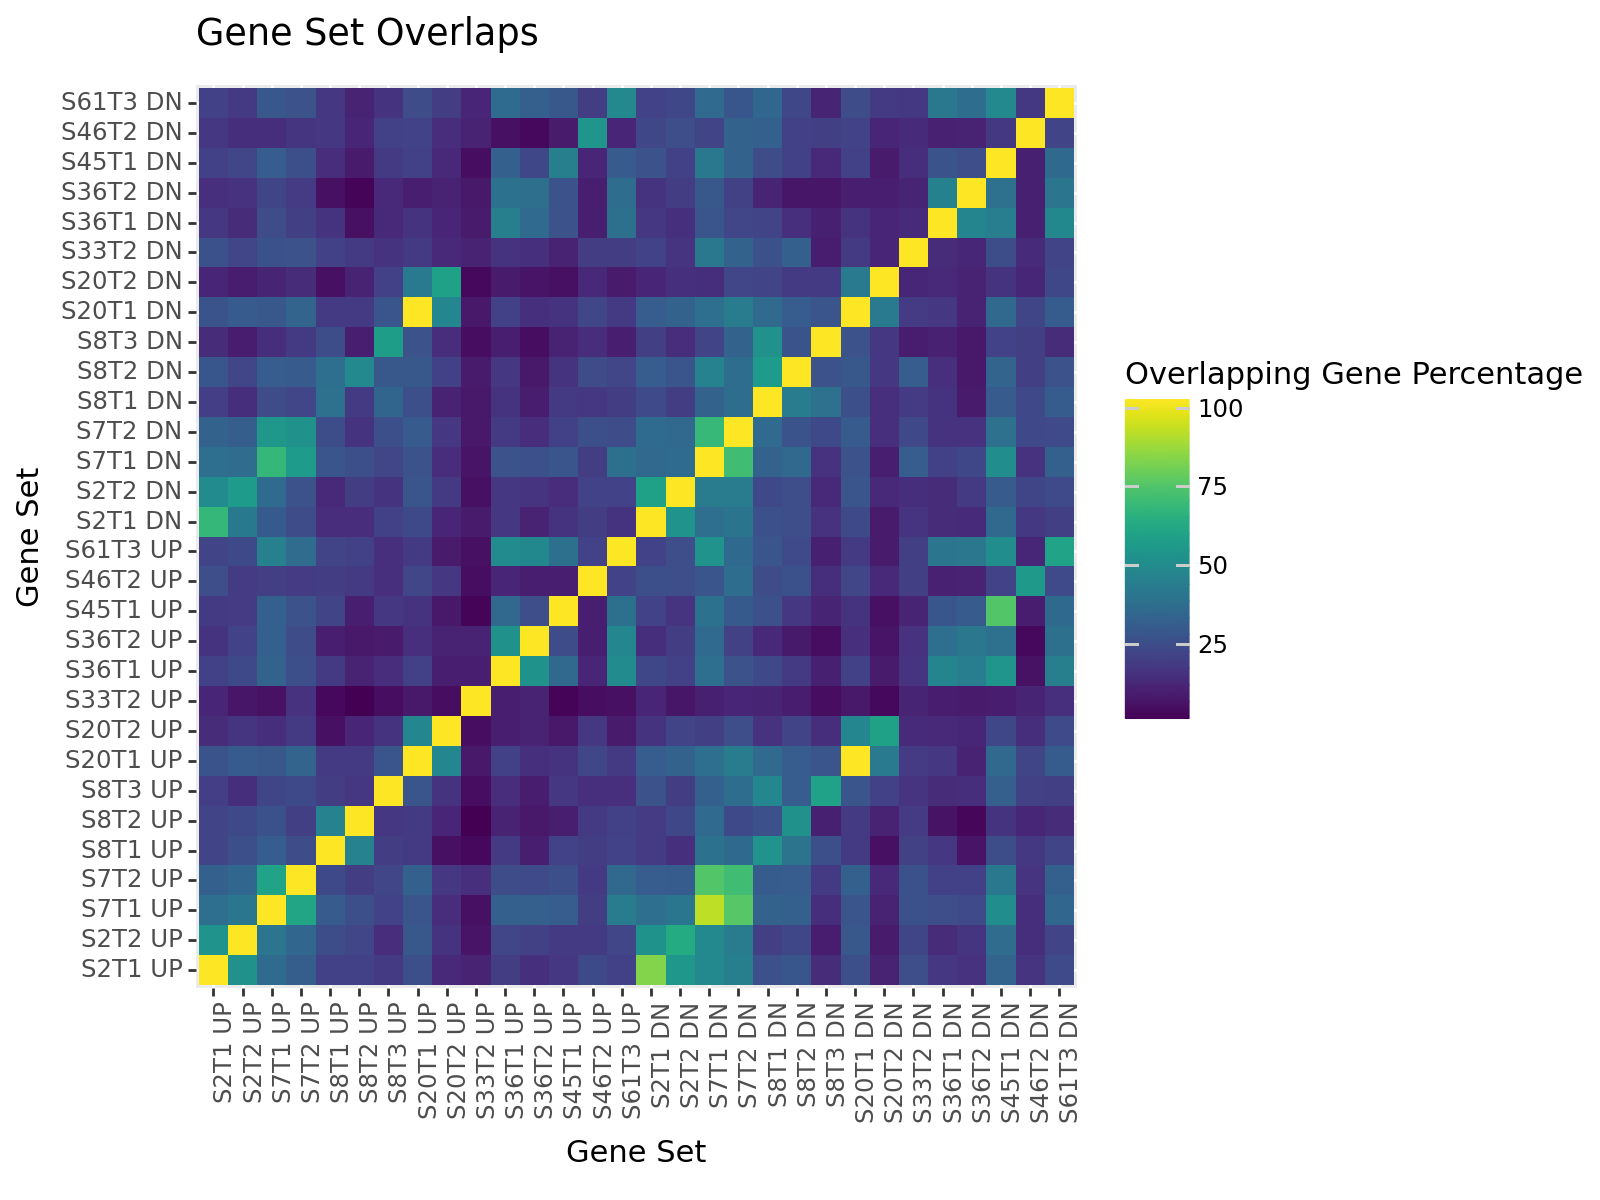

<Figure Size: (800 x 600)>

In [30]:
(pn.ggplot(intersection_frac, pn.aes(x= 'set1', y = 'set2', fill = 'Overlapping Genes')) + 
    pn.geom_tile() + 
    pn.theme(axis_text_x = pn.element_text(angle = 90, vjust = 1, hjust=0)) +
    pn.xlab("Gene Set") + 
    pn.ylab("Gene Set") + 
    pn.ggtitle("Gene Set Overlaps") + 
    pn.guides(fill = pn.guide_colorbar(title = "Overlapping Gene Percentage")) + 
    pn.theme(figure_size=(8,6))
    )
# pn.gui


How correlated are these enrichments?

In [36]:
enamed = enrichments.rename(mapper = (lambda x: x.split("_")[0] + " " + x.split("_")[-1].upper()), axis =1)
correlations = enamed.corr('pearson')
correlations = correlations.astype('float')
correlations['set1'] = list(correlations.index)

,S20T1_deg_set_dn,S20T1_deg_set_up,S20T2_deg_set_dn,S20T2_deg_set_up,S2T1_deg_set_dn,S2T1_deg_set_up,S2T2_deg_set_dn,S2T2_deg_set_up,S33T2_deg_set_dn,S33T2_deg_set_up,...,S7T1_deg_set_dn,S7T1_deg_set_up,S7T2_deg_set_dn,S7T2_deg_set_up,S8T1_deg_set_dn,S8T1_deg_set_up,S8T2_deg_set_dn,S8T2_deg_set_up,S8T3_deg_set_dn,S8T3_deg_set_up
AAACAGCTTTCAGAAG-1_36B_S20T1,-0.212784,-0.212784,-0.178419,-0.211182,-0.100842,-0.107279,-0.161339,-0.008207,-0.026782,-0.155484,...,0.026787,0.066791,-0.041500,-0.010353,-0.103168,0.060086,-0.184039,-0.078778,-0.242214,-0.177630
AAACAGGGTCTATATT-1_36B_S20T1,-0.069541,-0.069541,-0.029943,-0.053980,-0.025499,-0.121982,-0.095032,-0.031038,-0.100512,-0.165320,...,-0.153738,-0.145195,-0.144230,-0.167317,-0.187381,-0.124402,-0.131593,-0.210500,-0.224129,-0.157858
AAACCGGGTAGGTACC-1_36B_S20T1,0.350838,0.350838,0.550461,0.365069,-0.016914,-0.081016,0.016077,-0.154458,-0.019120,0.242101,...,-0.015160,-0.015757,-0.009832,0.009018,0.165482,0.096008,0.105917,-0.039644,0.170186,0.151118
AAACCGTTCGTCCAGG-1_36B_S20T1,-0.159423,-0.159423,-0.098133,-0.022225,-0.255880,-0.259511,-0.209159,-0.339436,-0.293609,-0.097147,...,-0.433137,-0.361786,-0.333656,-0.296619,-0.265217,-0.306600,-0.198515,-0.234982,-0.175546,-0.184338
AAACCTCATGAAGTTG-1_36B_S20T1,0.013597,0.013597,-0.007833,0.031657,-0.210982,-0.075079,-0.148449,-0.169971,-0.220760,-0.165581,...,-0.312828,-0.191150,-0.237861,-0.211438,-0.112690,-0.070680,-0.186562,-0.245501,-0.105331,-0.072394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCTAGATACGCT-1_86D_S8T3,-0.190190,-0.190190,-0.244304,-0.182788,-0.135475,-0.145502,-0.221207,-0.231986,-0.134326,-0.062502,...,-0.277436,-0.197033,-0.219003,-0.171179,-0.015027,-0.034723,-0.094562,-0.211917,-0.045690,-0.182241
TTGTTGTGTGTCAAGA-1_86D_S8T3,-0.259514,-0.259514,-0.316164,-0.255111,-0.187983,-0.148295,-0.297031,-0.207214,-0.189479,-0.093642,...,-0.205875,-0.210597,-0.186860,-0.184155,-0.171991,-0.079789,-0.241558,-0.367651,-0.124167,-0.168096
TTGTTTCACATCCAGG-1_86D_S8T3,-0.256727,-0.256727,-0.342360,-0.319850,-0.216808,-0.194929,-0.238098,-0.234561,-0.228599,-0.121729,...,-0.345930,-0.329587,-0.275703,-0.255888,-0.186034,-0.211443,-0.279017,-0.350045,-0.078176,-0.250733
TTGTTTCATTAGTCTA-1_86D_S8T3,-0.051253,-0.051253,-0.092503,-0.096204,-0.099076,-0.033047,-0.124300,-0.089341,0.007947,0.053904,...,-0.043194,-0.072095,0.037323,-0.043482,0.189142,0.146922,0.018006,-0.183098,0.151880,0.012545


In [56]:
# correlations = correlations.astype('float')
# correlations['set1'] = correlations.index
correlations_tidy = correlations.melt(id_vars = ['set1'], 
    value_name = 'Correlation', 
    var_name = 'set2')
correlations_tidy['set1'] = correlations_tidy['set1'].astype(cat_ordered)
correlations_tidy['set2'] = correlations_tidy['set2'].astype(cat_ordered)

0.6323966146917259

c:\Users\cbainton\AppData\Local\anaconda3\envs\tf\lib\site-packages\plotnine\scales\scales.py:50: PlotnineWarning: Scale for 'fill' is already present.
Adding another scale for 'fill',
which will replace the existing scale.



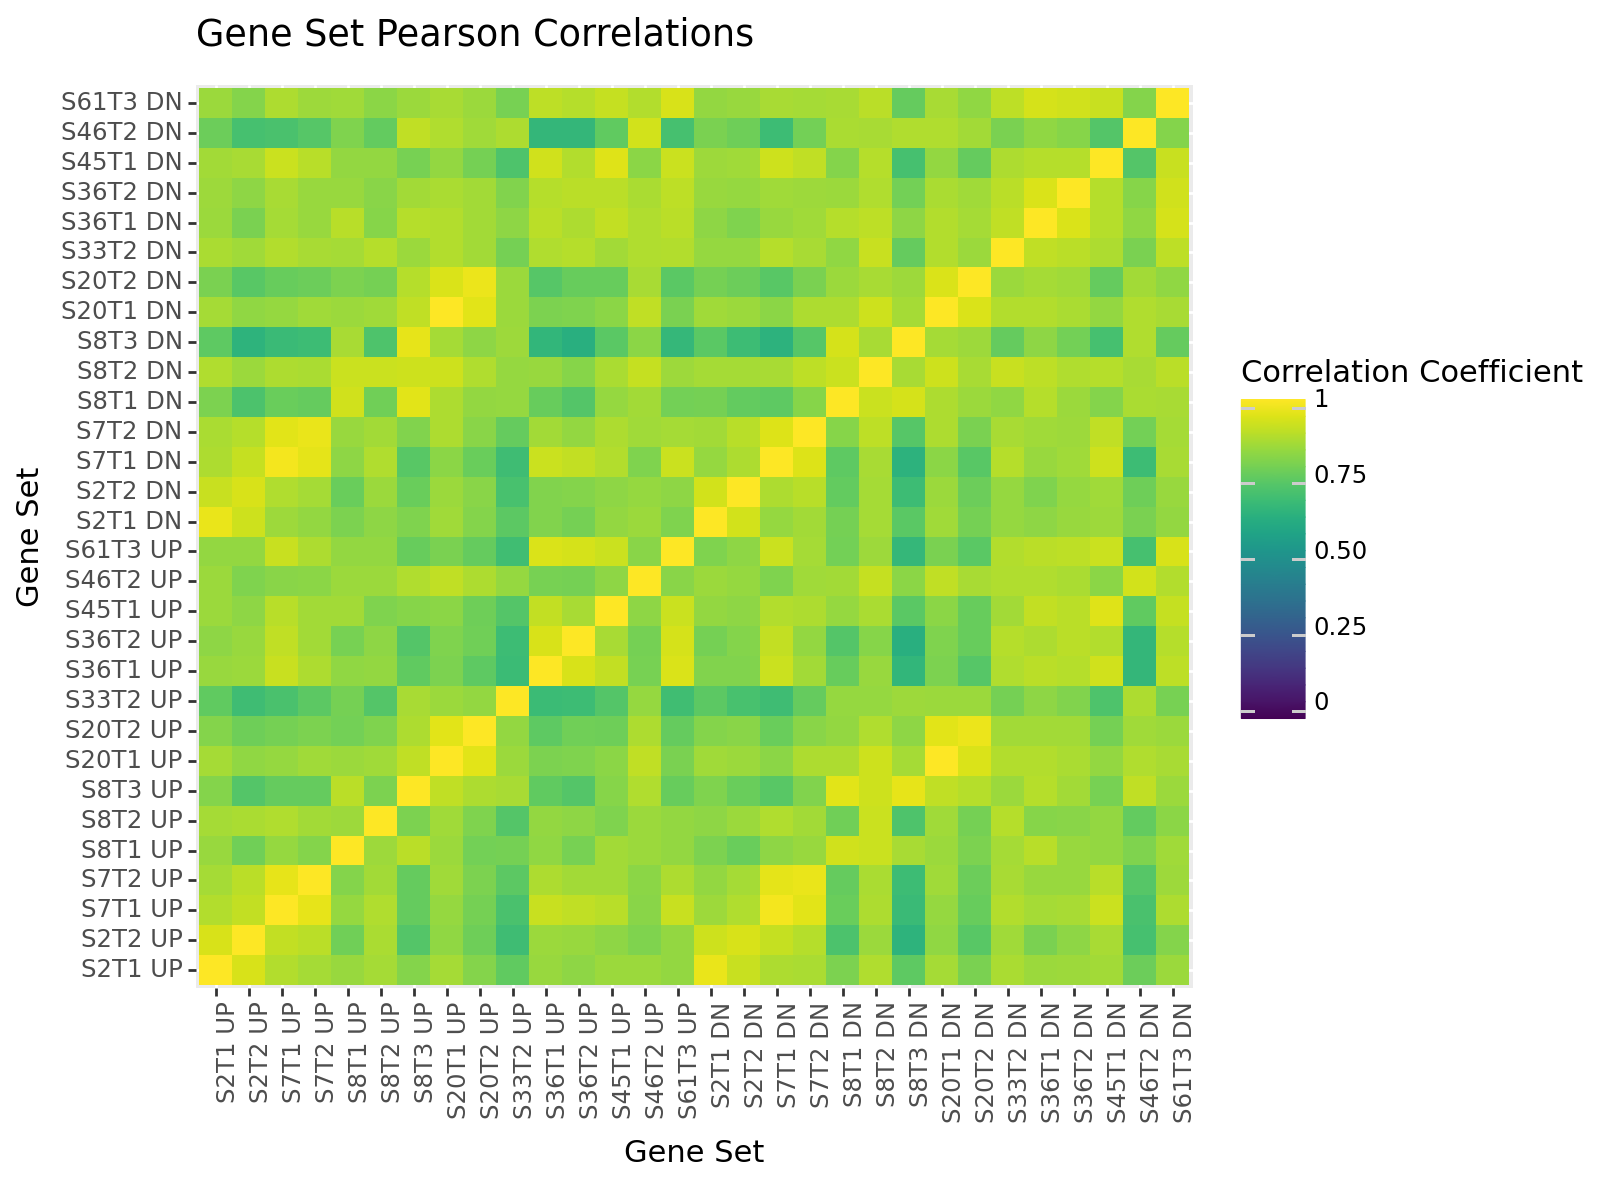

<Figure Size: (800 x 600)>

In [35]:
(pn.ggplot(correlations_tidy, pn.aes(x= 'set1', y = 'set2', fill = 'Correlation')) + 
    pn.geom_tile() + 
    pn.theme(axis_text_x = pn.element_text(angle = 90, vjust = 1, hjust=0)) +
    pn.xlab("Gene Set") + 
    pn.ylab("Gene Set") + 
    pn.ggtitle("Gene Set Pearson Correlations") + 
    # pn.scales.scale_fill_distiller()
    pn.scales.scale_fill_gradient(low = 'white', high = 'purple') + 
    pn.guides(fill = pn.guide_colorbar(title = "Correlation Coefficient")) +
    pn.lims(fill = (0, 1)) + 
    pn.theme(figure_size=(8,6))
    )

### General Plotting

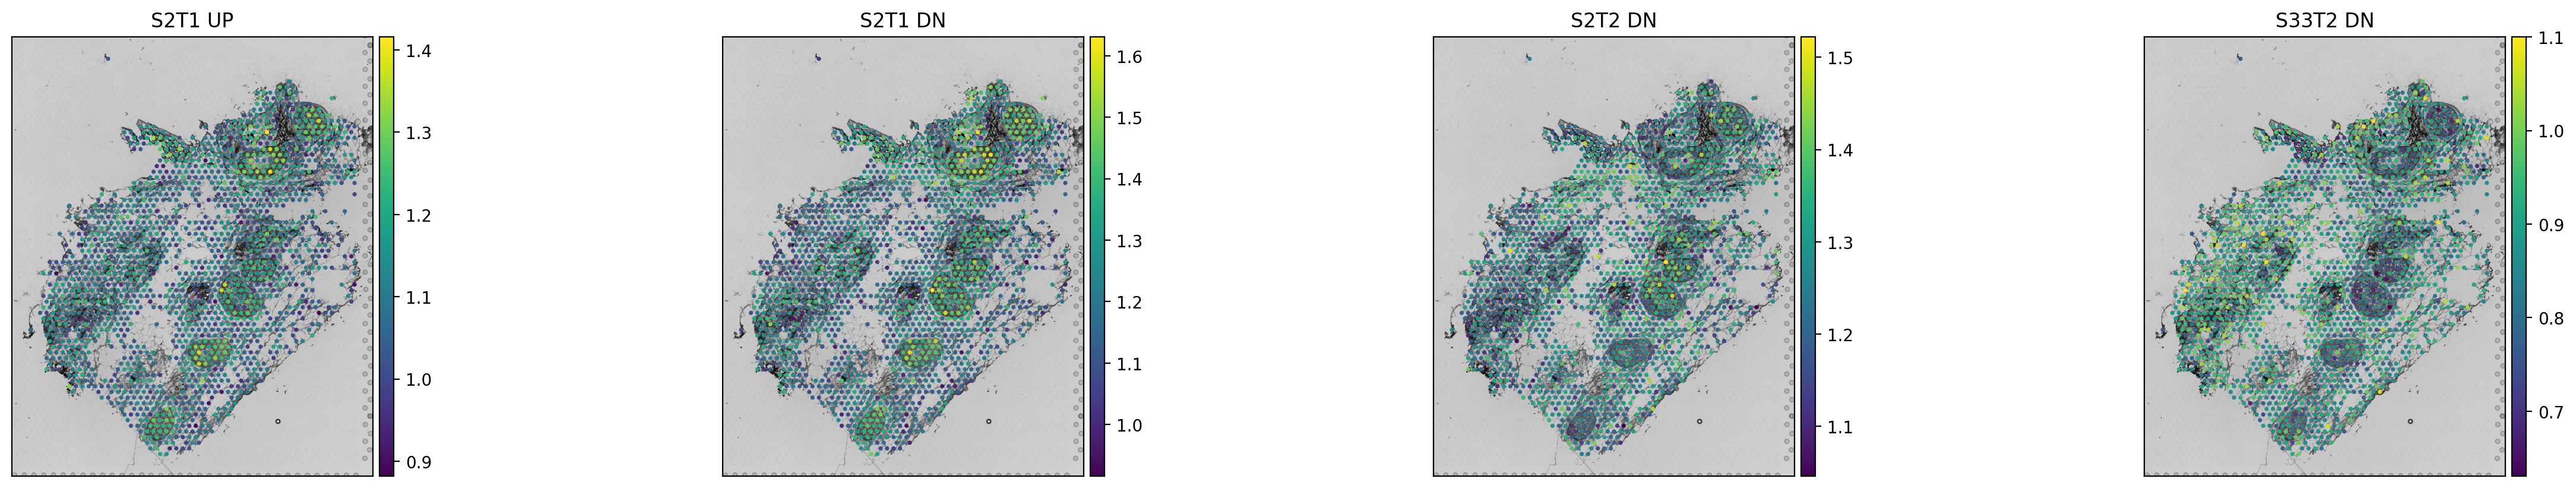

In [3]:
%config InlineBackend.figure_format = "retina"
from anndata import AnnData, read_h5ad
from scanpy.plotting import spatial
import matplotlib.pyplot as plt

slide_data = read_h5ad("intermediate_data/enrichments_on_updn_de/S2T1_de_gene_enrichments.h5ad")
slide_data.X = slide_data.layers['nonnormalized'] # Get nonnormalized
means = slide_data.to_df().mean(axis=1)
slide_data.X = slide_data.to_df().div(means, axis = 0)

scores_of_interest = ['S2T1_deg_set_up', 'S2T1_deg_set_dn', 'S2T2_deg_set_dn', 'S33T2_deg_set_dn']

figs = spatial(slide_data, bw = True, color = scores_of_interest,
                     show = False)
# plt.set_cmap()
for fig, score in zip(figs, scores_of_interest):
    fig.set_xlabel("")
    fig.set_ylabel("")
    fig.set_title(score.split("_")[0] + " " + score.split("_")[-1].upper())

plt.show()

## External Gene Sets

In [8]:
from gseapy import read_gmt
external_gene_set = read_gmt('intermediate_data/external_data/genesets.c6_breast_keyword.hsabiens.gmt')
external_gene_set= {x:set(y) for x, y in external_gene_set.items()} # Convert to sets

In [13]:
external_intersection_frac = pd.DataFrame(columns=['set1', 'set2', 'Overlapping Genes Percent'])

external_intersections_dict = {}
for set1 in external_gene_set.keys():
    for set2 in external_gene_set.keys():
        external_intersections_dict[(set1, set2)] = len(external_gene_set[set1] & external_gene_set[set2]) # how large is the intersection
        external_intersection_frac = pd.concat([external_intersection_frac,
                                       pd.DataFrame(
                                           data = {'set1':set1, 'set2' : set2, 
                                                   'Overlapping Genes Percent' : len(external_gene_set[set1] & external_gene_set[set2]) /
                                                   len(external_gene_set[set1]) * 100},
                                           columns=['set1', 'set2', 'Overlapping Genes Percent'],
                                           index=[0]
                                       )], axis = 0)
        # print(external_intersections_dict[(set1, set2)])
external_intersection_frac['Overlapping Genes Percent'] = external_intersection_frac['Overlapping Genes Percent'].astype('float')

C:\Users\cbainton\AppData\Local\Temp\ipykernel_29660\3260340603.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


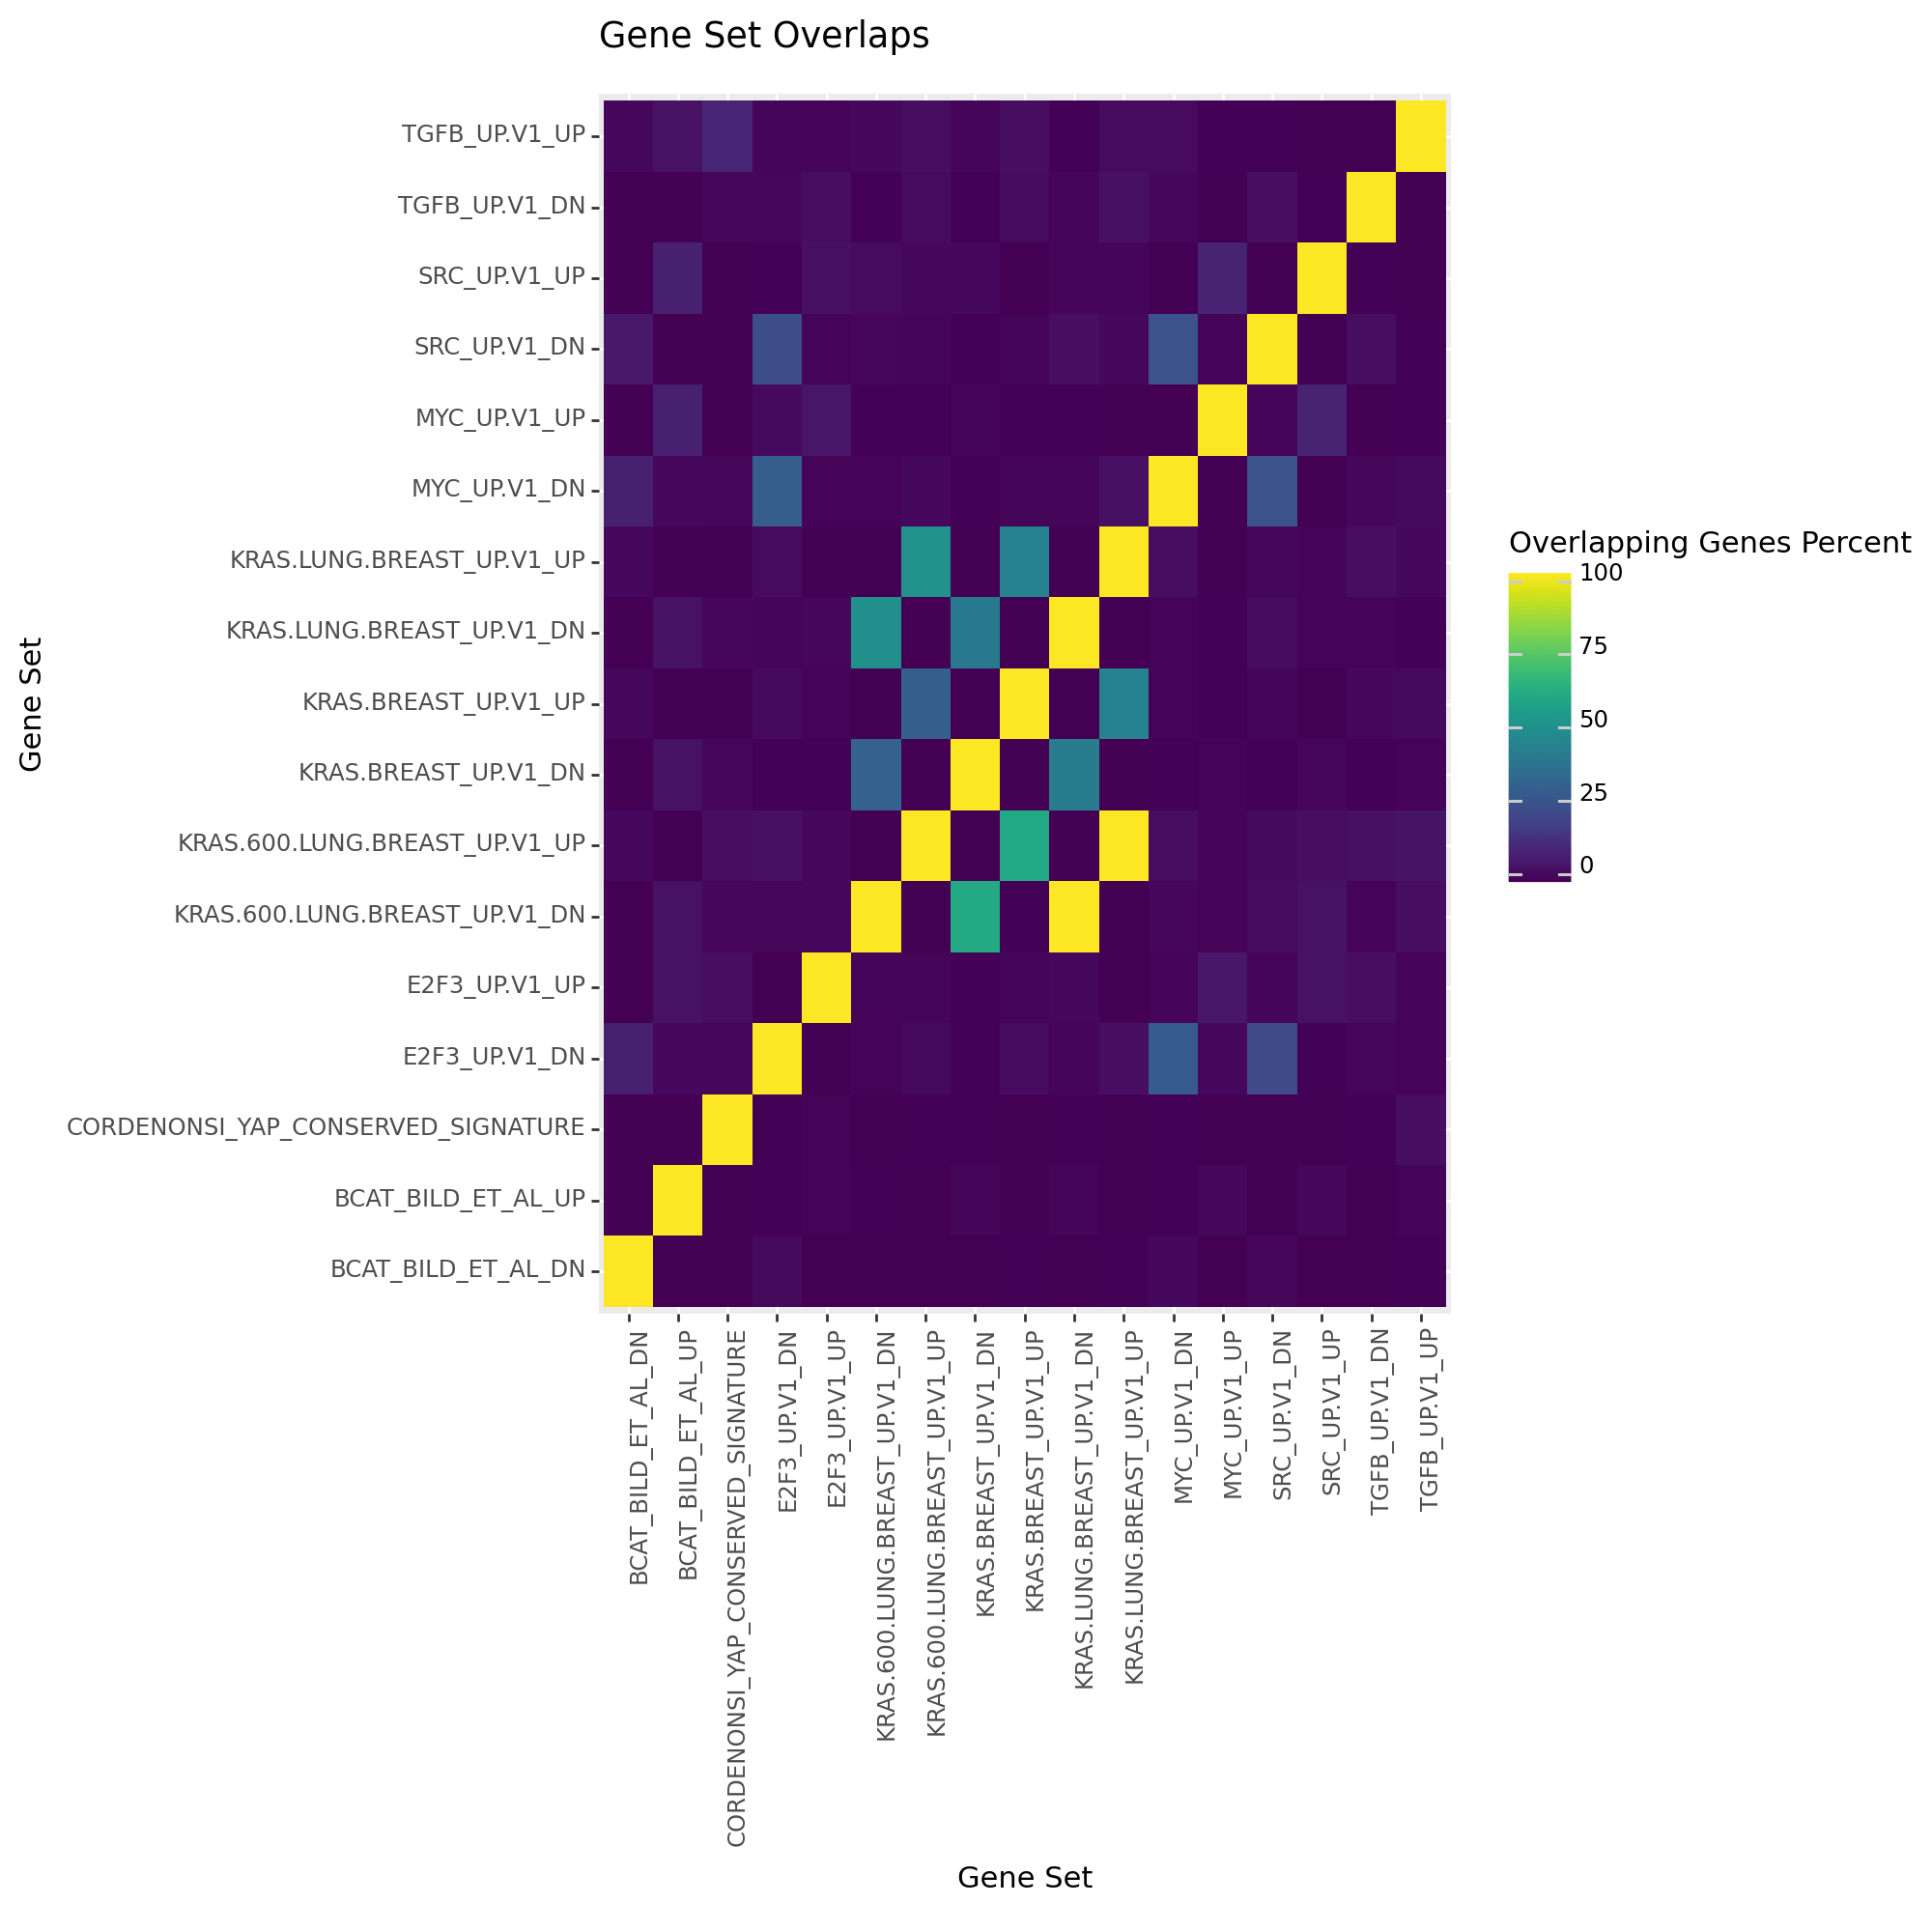

<Figure Size: (1000 x 1000)>

In [14]:
(pn.ggplot(external_intersection_frac, pn.aes(x= 'set1', y = 'set2', fill = 'Overlapping Genes Percent')) + 
    pn.geom_tile() + 
    pn.theme(axis_text_x = pn.element_text(angle = 90, vjust = 1, hjust=0)) +
    pn.xlab("Gene Set") + 
    pn.ylab("Gene Set") + 
    pn.ggtitle("Gene Set Overlaps") + 
    pn.theme(figure_size = (10, 10))#+ 
    # pn.guides(pn.guide_legend(title = "Overlapping Genes"))
    )

In [61]:
data_dir = "intermediate_data/predicted_enrichments/predicted_external"
# print(os.path.exists(data_dir + "/" + "enrichments_temp.csv"))
enrichments = pd.read_csv(data_dir + "/" + "orig_enrichments.csv", index_col=0)
spot_info = pd.read_csv(data_dir + "/"+ "orig_info.csv", index_col=0)
# predicted_enrichments = pd.read_csv(data_dir + "/" + "predicted.csv")

In [62]:
# enamed = enrichments.rename(mapper = (lambda x: x.split("_")[0] + " " + x.split("_")[-1]), axis =1)
correlations = enrichments.corr('pearson')
correlations = correlations.astype('float')
correlations['set1'] = list(correlations.index)
correlations_tidy = correlations.melt(id_vars = ['set1'], 
    value_name = 'Correlation', 
    var_name = 'set2')

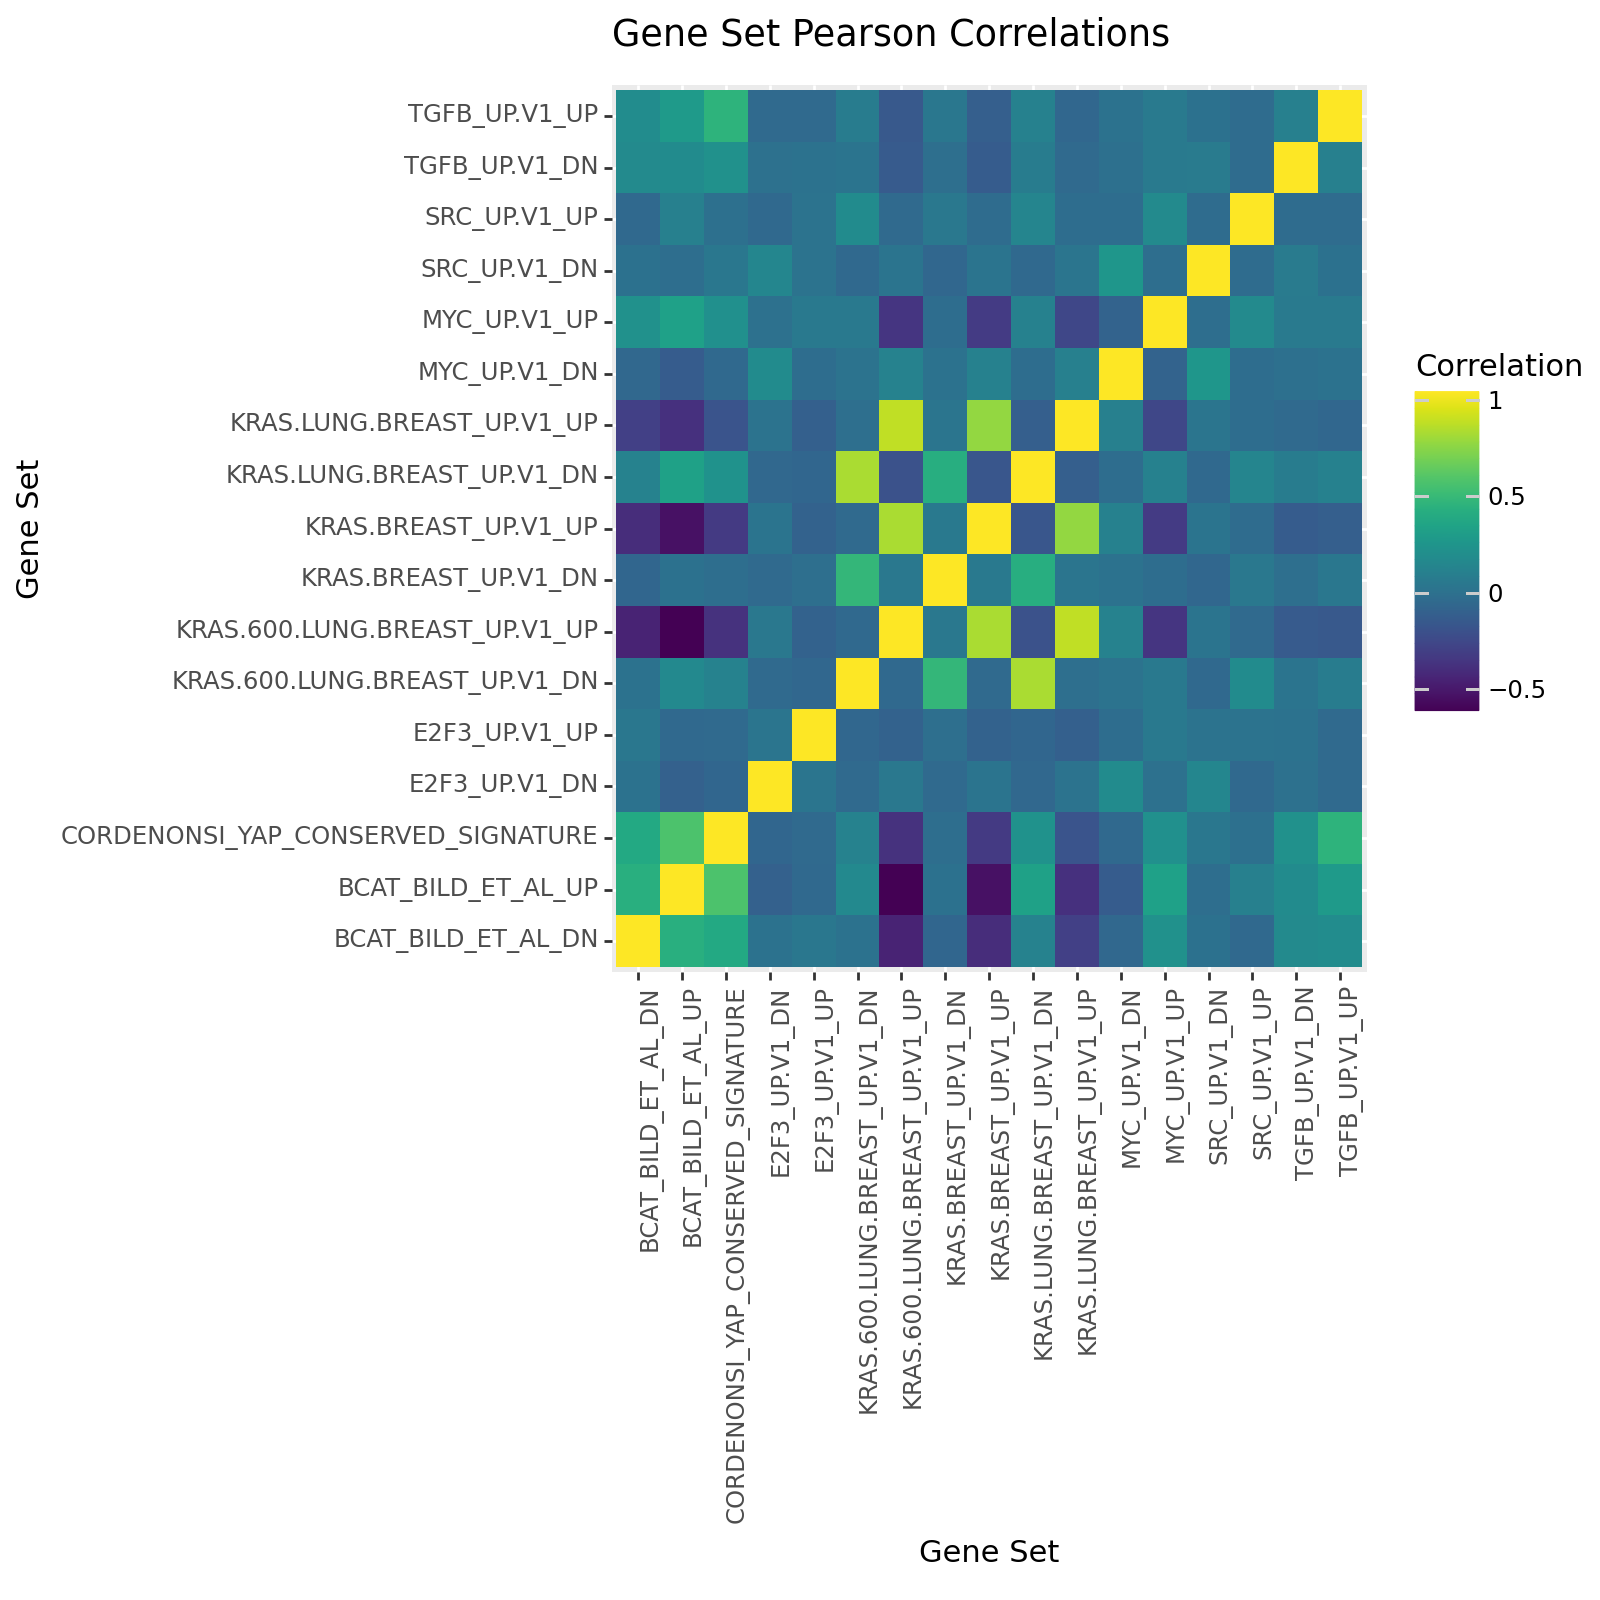

<Figure Size: (800 x 800)>

In [71]:
(pn.ggplot(correlations_tidy, pn.aes(x= 'set1', y = 'set2', fill = 'Correlation')) + 
    pn.geom_tile() + 
    pn.theme(axis_text_x = pn.element_text(angle = 90, vjust = 1, hjust=0)) +
    pn.xlab("Gene Set") + 
    pn.ylab("Gene Set") + 
    pn.ggtitle("Gene Set Pearson Correlations") + 
    pn.theme(figure_size=(8,8)) #+
    # pn.scales.scale_fill_distiller()
    # pn.scales.scale_fill_gradient(low = 'green', high = 'purple') # + 
    # pn.guides(pn.guide_legend(title = "Correlation Coefficient"))
    )

### Make Showy Figures

In [1]:
%config InlineBackend.figure_format = "retina"
from anndata import read_h5ad
from scanpy.plotting import spatial
import glob
import matplotlib.pyplot as plt
# s36t1 = read_h5ad("intermediate_data/enrichments_on_updn_de/S36T1_de_gene_enrichments.h5ad")
# s36t1.X = s36t1.layers['nonnormalized'] # Get nonnormalized
# means = s36t1.to_df().mean(axis=1)
# std = s36t1.to_df().std(axis=1)

# spatial(s36t1, bw = True, color = ['S36T1_deg_set_dn', 'classification'])
# spatial(s36t1, bw = True, color = ')
# s36t1
plt.figure(dpi=300)
for slide_path in glob.glob("intermediate_data/enrichments_on_updn_de/*h5ad"):
    slide = slide_path.split("_")[-4].split("\\")[1]
    temp_adata =read_h5ad(f"intermediate_data/enrichments_on_updn_de/{slide}_de_gene_enrichments.h5ad")
    slide_score = 'S36T1'
    # temp_adata.obs['normed_own_dn']
    temp_dn_mean = temp_adata.to_df()[f"{slide_score}_deg_set_dn"].mean()
    temp_adata.obs['normed_own_dn'] =  temp_adata.to_df()[f"{slide_score}_deg_set_dn"].div(temp_dn_mean)
    
    temp_adata.obs['classification'] = temp_adata.obs['classification'].str.capitalize()
    ax1, ax2 = spatial(temp_adata, bw = True, color = ["normed_own_dn", 'classification'], 
            title = [f"Enrichment for {slide_score} DN", "Pathologist Tissue Classification"],
            show=False)
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax2.set_xlabel("")
    ax2.set_ylabel("")


plt.show()

KeyError: 'S36T1_deg_set_dn_deg_set_dn'

<Figure size 1920x1440 with 0 Axes>

glob.glob("intermediate_data/enrichments_on_updn_de/*h5ad")